In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

ncaa = pd.read_csv("NCAA data/Top 100 Rookies.csv")
ncaa_season = pd.read_csv("NCAA data/cleaned_ncaa_data.csv")
nba_13_14 = pd.read_csv("NBA data per game (player)/13-14 nba data.csv")
nba_14_15 = pd.read_csv("NBA data per game (player)/14-15 nba data.csv")
nba_15_16 = pd.read_csv("NBA data per game (player)/15-16 nba data.csv")
nba_16_17 = pd.read_csv("NBA data per game (player)/16-17 nba data.csv")
nba_17_18 = pd.read_csv("NBA data per game (player)/17-18 nba data.csv")

ncaa.head()

,Rk,Year,Lg,Rd,Pk,Tm,Player,Pos,Born,College,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,1,2014,NBA,1,8,SAC,Nik Stauskas,G,ca,University of Michigan,...,2.1,1.5,0.4,0.2,0.389,0.438,0.353,0.815,3.9,0.028
1,2,2014,NBA,2,40,MIN,Glenn Robinson III,G-F,us,University of Michigan,...,2.1,0.6,0.4,0.2,0.439,0.479,0.361,0.729,4.6,0.072
2,3,2014,NBA,1,24,CHH,Shabazz Napier,G,us,University of Connecticut,...,1.7,2.0,0.8,0.1,0.393,0.430,0.352,0.812,6.2,0.065
3,4,2014,NBA,1,13,MIN,Zach LaVine,G,us,University of California Los Angeles,...,3.4,3.5,0.8,0.2,0.446,0.481,0.373,0.824,8.1,0.044
4,5,2014,NBA,1,9,CHH,Noah Vonleh,F,us,Indiana University,...,5.4,0.8,0.4,0.4,0.453,0.491,0.316,0.683,8.3,0.075


In [2]:
ncaa = ncaa[['Player', 'Rd', 'Year']]
ncaa.head()

,Player,Rd,Year
0,Nik Stauskas,1,2014
1,Glenn Robinson III,2,2014
2,Shabazz Napier,1,2014
3,Zach LaVine,1,2014
4,Noah Vonleh,1,2014


In [3]:
ncaa_season = ncaa_season.groupby(['full_name'])
ncaa_season = ncaa_season.sum()
ncaa_season = ncaa_season.reset_index()
ncaa_season = ncaa_season.rename(columns={'full_name':'Player'})
ncaa_season.head()

,Player,season,points,minutes_int64,field_goals_made,field_goals_att,field_goals_pct,three_points_made,three_points_att,three_points_pct,...,defensive_rebounds,rebounds,assists,turnovers,steals,blocks,assists_turnover_ratio,personal_fouls,tech_fouls,flagrant_fouls
0,A'Torey Everett,48384,58.0,233.0,17.0,44.0,616.6,4.0,7.0,300.0,...,18.0,21.0,17.0,19.0,2.0,1.0,15.33,33.0,1.0,0.0
1,A'Torri Shine,66458,440.0,1053.0,153.0,398.0,1226.1,59.0,174.0,1046.3,...,84.0,123.0,30.0,72.0,28.0,8.0,10.62,67.0,0.0,0.0
2,A.C. Reid,213616,543.0,2119.0,181.0,561.0,2875.5,139.0,455.0,2692.5,...,190.0,203.0,140.0,120.0,56.0,12.0,67.38,195.0,0.0,0.0
3,A.J. Astroth,124942,292.0,1030.0,105.0,230.0,2096.8,13.0,53.0,758.3,...,177.0,270.0,30.0,48.0,32.0,11.0,11.42,106.0,0.0,0.0
4,A.J. Avery,62431,73.0,308.0,24.0,63.0,816.6,0.0,0.0,0.0,...,46.0,85.0,4.0,17.0,4.0,20.0,3.00,47.0,0.0,0.0


In [4]:
combined_drafted = pd.merge(ncaa, ncaa_season, how='outer', on='Player')
combined_drafted = combined_drafted.dropna(subset=['Player', 'Rd', 'points'])
combined_drafted = combined_drafted.rename(columns={'field_goals_att':'FGA (ncaa)',
                                                   'field_goals_made':'FG (ncaa)',
                                                   'three_points_made':'3P (ncaa)',
                                                   'three_points_att':'3PA (ncaa)'})

combined_drafted.head()

,Player,Rd,Year,season,points,minutes_int64,FG (ncaa),FGA (ncaa),field_goals_pct,3P (ncaa),...,defensive_rebounds,rebounds,assists,turnovers,steals,blocks,assists_turnover_ratio,personal_fouls,tech_fouls,flagrant_fouls
0,Nik Stauskas,1.0,2014.0,72468.0,630.0,1281.0,185.0,394.0,1650.3,92.0,...,90.0,105.0,118.0,67.0,20.0,11.0,63.91,47.0,0.0,0.0
1,Glenn Robinson III,2.0,2014.0,74481.0,484.0,1194.0,182.0,373.0,1774.8,33.0,...,110.0,164.0,44.0,46.0,35.0,11.0,21.58,55.0,0.0,0.0
2,Shabazz Napier,1.0,2014.0,80520.0,720.0,1404.0,213.0,496.0,1793.3,87.0,...,196.0,234.0,195.0,114.0,73.0,13.0,89.51,84.0,2.0,0.0
3,Zach LaVine,1.0,2014.0,74481.0,349.0,904.0,127.0,288.0,1508.4,48.0,...,76.0,94.0,66.0,42.0,33.0,6.0,38.75,73.0,0.0,0.0
4,Noah Vonleh,1.0,2014.0,60390.0,338.0,794.0,113.0,216.0,1573.6,16.0,...,198.0,269.0,18.0,64.0,26.0,41.0,7.16,81.0,0.0,0.0


In [5]:
college_firstyear = combined_drafted[['Player', 'Rd', 'Year', 'FG (ncaa)', 'FGA (ncaa)', '3P (ncaa)', '3PA (ncaa)']]

In [6]:
nba_13_14.head()

,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Quincy Acy,23,TOT,63,0,13.4,1.0,2.2,0.468,...,0.660,1.1,2.3,3.4,0.4,0.4,0.4,0.5,1.9,2.7
1,1,Quincy Acy,23,TOR,7,0,8.7,0.9,2.0,0.429,...,0.625,0.7,1.4,2.1,0.6,0.6,0.4,0.3,1.1,2.7
2,1,Quincy Acy,23,SAC,56,0,14.0,1.1,2.3,0.472,...,0.667,1.2,2.4,3.6,0.4,0.3,0.4,0.5,2.0,2.7
3,2,Steven Adams,20,OKC,81,20,14.8,1.1,2.3,0.503,...,0.581,1.8,2.3,4.1,0.5,0.5,0.7,0.9,2.5,3.3
4,3,Jeff Adrien,27,TOT,53,12,18.1,2.7,5.2,0.520,...,0.639,1.9,3.8,5.8,0.7,0.5,0.7,0.7,2.0,6.8


In [7]:
nba_ncaa_rookies = pd.merge(nba_13_14, college_firstyear, how='inner', on='Player')
nba_ncaa_rookies = pd.merge(nba_14_15, college_firstyear, how='inner', on='Player')
nba_ncaa_rookies = pd.merge(nba_15_16, college_firstyear, how='inner', on='Player')
nba_ncaa_rookies = pd.merge(nba_16_17, college_firstyear, how='inner', on='Player')
nba_ncaa_rookies = pd.merge(nba_17_18, college_firstyear, how='inner', on='Player')
nba_ncaa_rookies = nba_ncaa_rookies.drop_duplicates(subset='Player', keep='first')
nba_ncaa_rookies.head()

,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,BLK,TOV,PF,PTS,Rd,Year,FG (ncaa),FGA (ncaa),3P (ncaa),3PA (ncaa)
0,8,Jarrett Allen,19,BRK,72,31,20.0,3.3,5.5,0.589,...,1.2,1.1,2.0,8.2,1.0,2017.0,179.0,316.0,0.0,7.0
1,12,Justin Anderson,24,PHI,38,0,13.7,2.3,5.3,0.431,...,0.2,0.4,1.4,6.2,1.0,2015.0,199.0,457.0,77.0,206.0
2,13,Kyle Anderson,24,SAS,74,67,26.7,3.1,5.9,0.527,...,0.8,1.3,1.5,7.9,1.0,2014.0,313.0,729.0,94.0,256.0
3,18,OG Anunoby,20,TOR,74,62,20.0,2.2,4.7,0.471,...,0.2,0.6,1.8,5.9,1.0,2017.0,134.0,238.0,27.0,74.0
4,29,Lonzo Ball,20,LAL,52,50,34.2,3.9,10.8,0.360,...,0.8,2.6,2.3,10.2,1.0,2017.0,189.0,343.0,80.0,194.0


In [8]:
nba_ncaa_rookies['2PA (ncaa)'] = nba_ncaa_rookies['FGA (ncaa)'] - nba_ncaa_rookies['3PA (ncaa)']
nba_ncaa_rookies['2P (ncaa)'] = nba_ncaa_rookies['FG (ncaa)'] - nba_ncaa_rookies['3P (ncaa)']
nba_ncaa_rookies['2P% (ncaa)'] = nba_ncaa_rookies['2P (ncaa)'] / nba_ncaa_rookies['2PA (ncaa)']
nba_ncaa_rookies['3P% (ncaa)'] = nba_ncaa_rookies['3P (ncaa)'] / nba_ncaa_rookies['3PA (ncaa)']
nba_ncaa_rookies.head()


,Rk,Player,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Rd,Year,FG (ncaa),FGA (ncaa),3P (ncaa),3PA (ncaa),2PA (ncaa),2P (ncaa),2P% (ncaa),3P% (ncaa)
0,8,Jarrett Allen,19,BRK,72,31,20.0,3.3,5.5,0.589,...,1.0,2017.0,179.0,316.0,0.0,7.0,309.0,179.0,0.579288,0.000000
1,12,Justin Anderson,24,PHI,38,0,13.7,2.3,5.3,0.431,...,1.0,2015.0,199.0,457.0,77.0,206.0,251.0,122.0,0.486056,0.373786
2,13,Kyle Anderson,24,SAS,74,67,26.7,3.1,5.9,0.527,...,1.0,2014.0,313.0,729.0,94.0,256.0,473.0,219.0,0.463002,0.367188
3,18,OG Anunoby,20,TOR,74,62,20.0,2.2,4.7,0.471,...,1.0,2017.0,134.0,238.0,27.0,74.0,164.0,107.0,0.652439,0.364865
4,29,Lonzo Ball,20,LAL,52,50,34.2,3.9,10.8,0.360,...,1.0,2017.0,189.0,343.0,80.0,194.0,149.0,109.0,0.731544,0.412371


In [9]:
combined_seasons = nba_ncaa_rookies[['Player', 'Age',
                                     '2P%', '3P%',
                                     '2P% (ncaa)','3P% (ncaa)']]
combined_seasons.head()

,Player,Age,2P%,3P%,2P% (ncaa),3P% (ncaa)
0,Jarrett Allen,19,0.599,0.333,0.579288,0.000000
1,Justin Anderson,24,0.535,0.330,0.486056,0.373786
2,Kyle Anderson,24,0.556,0.333,0.463002,0.367188
3,OG Anunoby,20,0.604,0.371,0.652439,0.364865
4,Lonzo Ball,20,0.420,0.305,0.731544,0.412371


In [10]:
combined_total = pd.DataFrame(combined_seasons[['2P%', '3P%',
                                '2P% (ncaa)','3P% (ncaa)']].sum()/combined_seasons['2P%'].count())
# combined_total= combined_total.rename(columns={'0':'Calc'})
combined_total 


,0
2P%,0.520026
3P%,0.315256
2P% (ncaa),0.538606
3P% (ncaa),0.310877


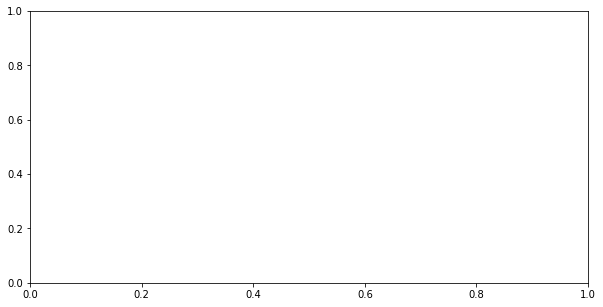

In [11]:
fig, ax = plt.subplots(figsize=(10,5))

plt.bar(pos, 
        #using df['pre_score'] data,
        combined_total['2P%'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in first_name
        label=df['first_name'][0]) 
